# 3. Regras de Associação

Continuaremos a trabalhar com a mesma base de dados dos trabalhos anteriores.

No trabalho atual, os dados devem ser transformados para transações.
Para isso, adotem a estratégia que acharem adequada.
Uma alternativa segue:

1) avaliar as distribuições dos dados numéricos e transformá-los em categóricos; e

2) transformar dados categóricos (inclusive os gerados no item anterior) e nominais em binário.

Além disso, manter os atributos removidos no Trabalho 2, mas gerar um atributo adicional seguindo a conta que segue:
df['engagement_total'] = ((df['likes'] + df['num_comments'] + df['video_view_count'])/df['followers'])*100
Por fim, esse novo atributo deve ser discretizado para casos de alto engajamento (1) e baixo engajamento (0).
Para isso, considerar os 25% maiores valores de engagement_total como alto engajamento.

Desta forma, a base resultante será de dados binários: cada linha representa uma transação/instância e cada coluna informa a ocorrência (1) ou não (0) dos itens/valores.
O objetivo aqui é gerar regras que associem os itens e que mostrem as características que levam a um alto engajamento (este item como um dos sufixos das regras).


In [21]:
from pickle import FALSE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparação dos dados

In [22]:
def binarize_categorical_columns(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df


In [23]:
df = pd.read_csv('preprocessing_result1.csv')
df

,content_type,tone,emotion_displayed,location_type,followers,likes,num_comments,video_view_count,has_a_person,vape_present,...,post_style_array_Promotion,type_of_content_array_Informational,type_of_content_array_Advertisement,type_of_content_array_Promotion,type_of_content_array_Warning,type_of_content_array_Campaign,type_of_content_array_Health,target_demographic_Other,type_of_content_Other,post_style_Other
0,Image,Negative,other,Public,0.666791,0.09375,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Image,Negative,other,Public,0.058824,0.06250,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,Image,Negative,other,Indoor,1.000000,0.37500,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Image,Sarcastic,annoyance,Indoor,0.002978,0.09375,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,Image,Positive,other,Private,0.118019,0.21875,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,Image,Negative,other,Public,0.067759,0.12500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
979,Image,Positive,happiness,Public,0.970588,0.25000,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
980,Image,Negative,other,Public,0.003723,0.00000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
981,Image,Positive,happiness,Outdoor,0.193596,1.00000,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [24]:
df = binarize_categorical_columns(df, ['content_type', 'tone', 'emotion_displayed', 'location_type'])
df.dtypes

followers                float64
likes                    float64
num_comments             float64
video_view_count         float64
has_a_person             float64
                          ...   
location_type_Indoor        bool
location_type_Neutral       bool
location_type_Outdoor       bool
location_type_Private       bool
location_type_Public        bool
Length: 110, dtype: object

In [25]:
cols_to_booleans = [#'target_demographic_Black community',
 'target_demographic_adults',
 'target_demographic_teenagers',
 'target_demographic_young adults',
 'target_demographic_general audience',
 #'post_style_array_Inspirational',
 'post_style_array_Informational',
 'post_style_array_Promotion',
 'post_style_array_Announcement',
'has_a_person', 'vape_present', 'is_vaping', 'img_mentions_brands',
'text_mentions_brands',
'Health_ad',
 'are_there_children',
 'sensitive_content_bool',
#'type_of_content_array_Initiative',
 'type_of_content_array_Advertisement',
 'type_of_content_array_Promotion',
 'type_of_content_array_Health',
 'type_of_content_array_Campaign',
 'type_of_content_array_Informational',
 'type_of_content_array_Warning',
'target_demographic_colleges',
'target_demographic_Other',
'type_of_content_Other',
'post_style_Other'
]

# make all columns booleans
for column in cols_to_booleans:
   if df[column].dtype == 'float64':
       df[column] = df[column].astype('bool')
df

,followers,likes,num_comments,video_view_count,has_a_person,vape_present,is_vaping,img_mentions_brands,text_mentions_brands,Health_ad,...,emotion_displayed_supportive,emotion_displayed_surprise,emotion_displayed_thoughtful,emotion_displayed_tired,location_type_Commercial,location_type_Indoor,location_type_Neutral,location_type_Outdoor,location_type_Private,location_type_Public
0,0.666791,0.09375,0.0,0.0,False,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,True
1,0.058824,0.06250,0.0,0.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,1.000000,0.37500,0.0,0.0,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,0.002978,0.09375,0.0,0.0,True,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0.118019,0.21875,0.0,0.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,0.067759,0.12500,0.0,0.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
979,0.970588,0.25000,0.0,0.0,True,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,True
980,0.003723,0.00000,0.0,0.0,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
981,0.193596,1.00000,1.0,0.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [26]:
df.dtypes


followers                float64
likes                    float64
num_comments             float64
video_view_count         float64
has_a_person                bool
                          ...   
location_type_Indoor        bool
location_type_Neutral       bool
location_type_Outdoor       bool
location_type_Private       bool
location_type_Public        bool
Length: 110, dtype: object

In [27]:
df['engagement_total'] = ((df['likes'] + df['num_comments'] + df['video_view_count'])/(df['followers']+1))*100
df['high_engagement'] = np.where(df['engagement_total'] >= df['engagement_total'].quantile(0.75), True, False)
df['low_engagement'] = ~ df['high_engagement']
df.drop(columns=['engagement_total', 'likes', 'num_comments', 'video_view_count', 'followers'], inplace=True)

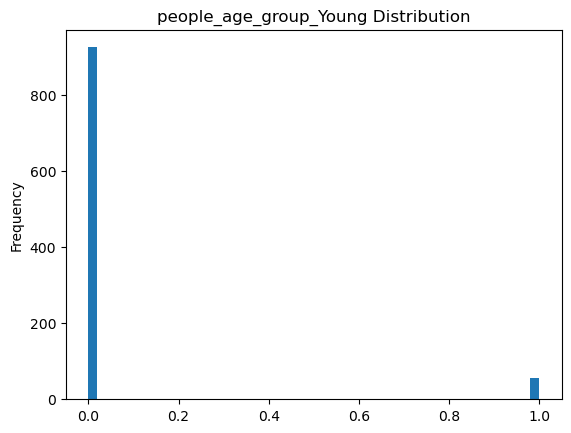

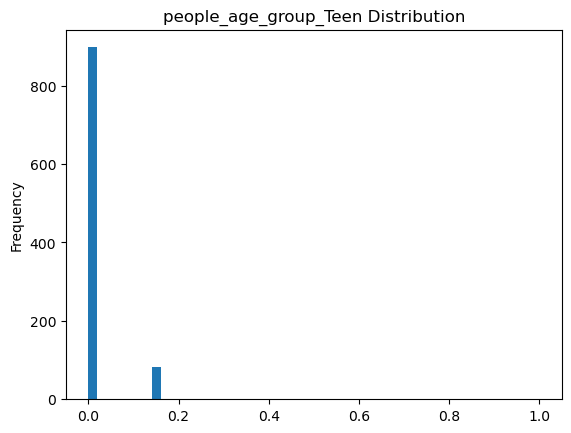

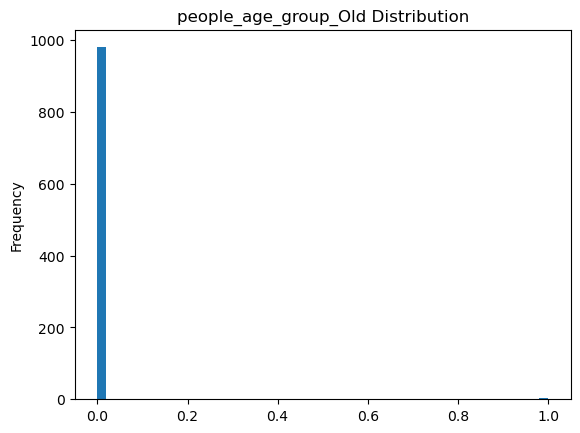

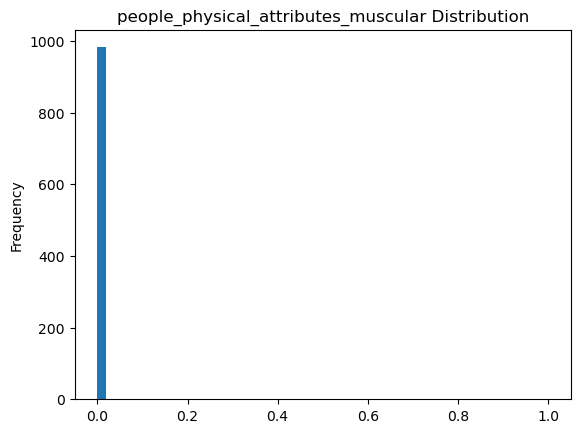

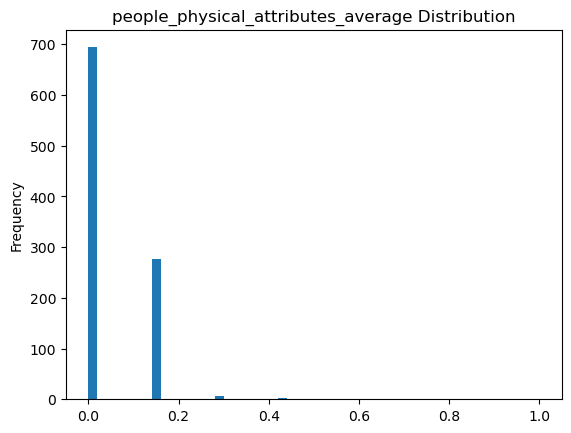

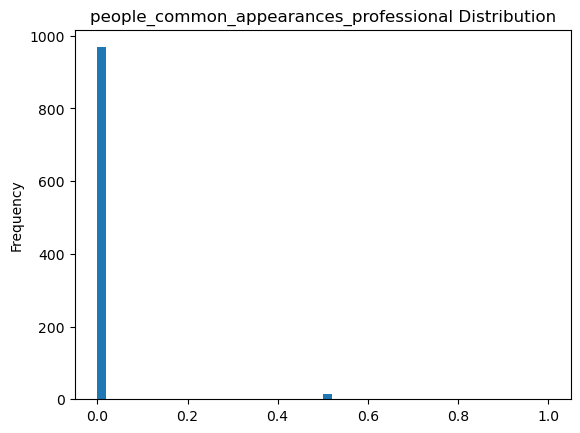

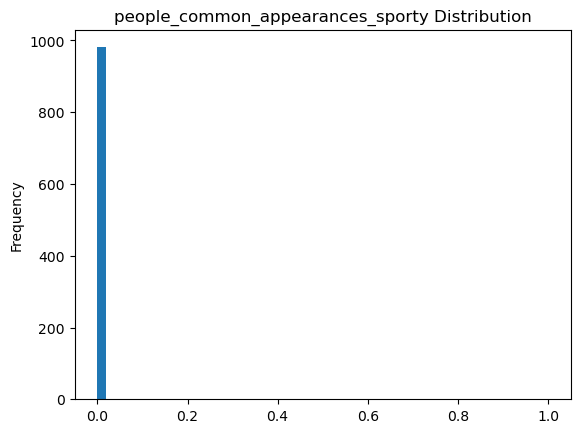

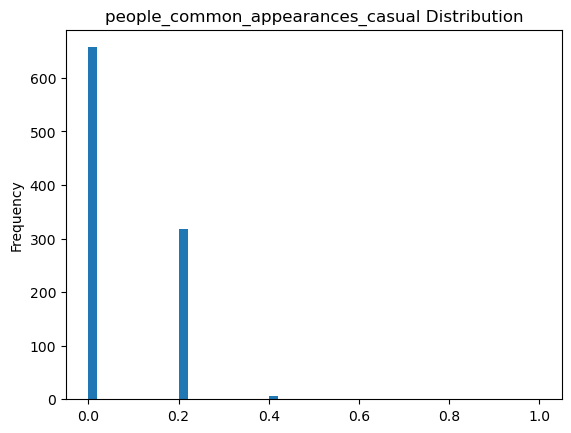

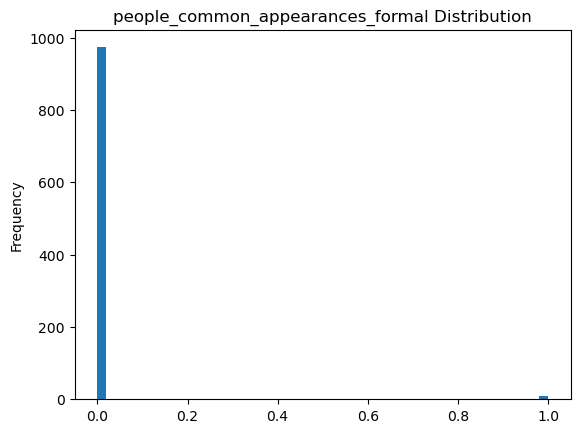

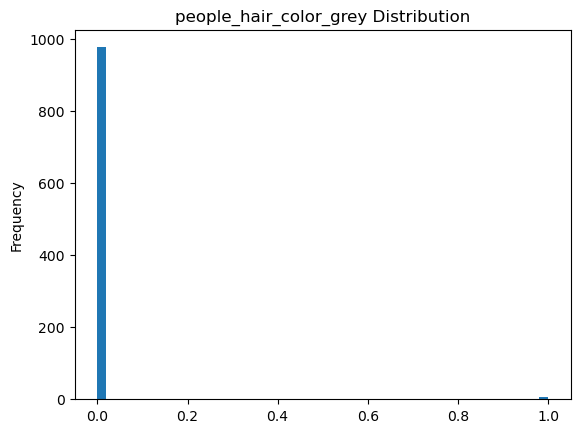

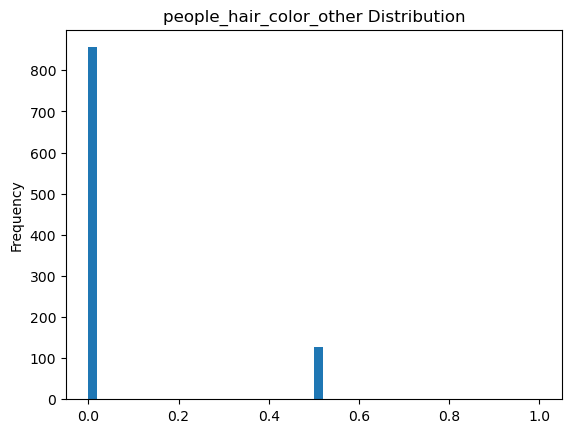

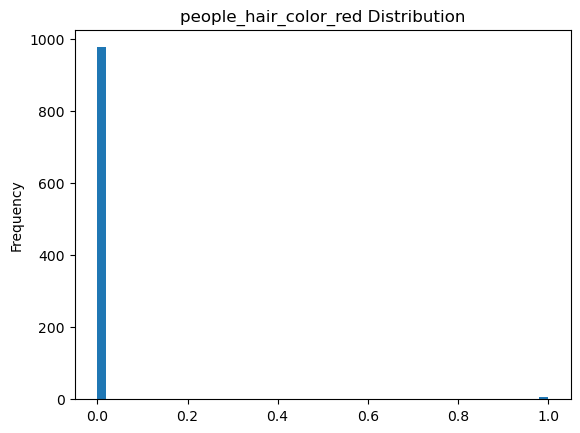

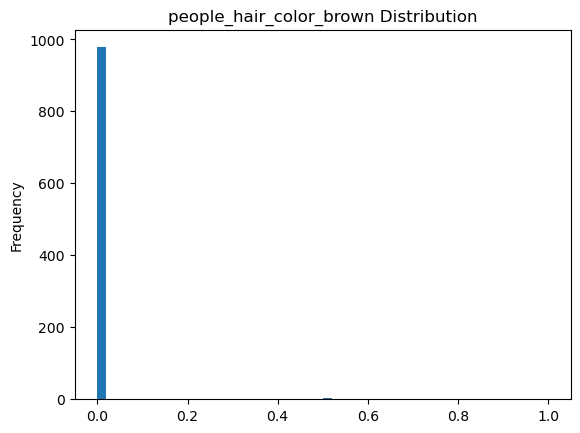

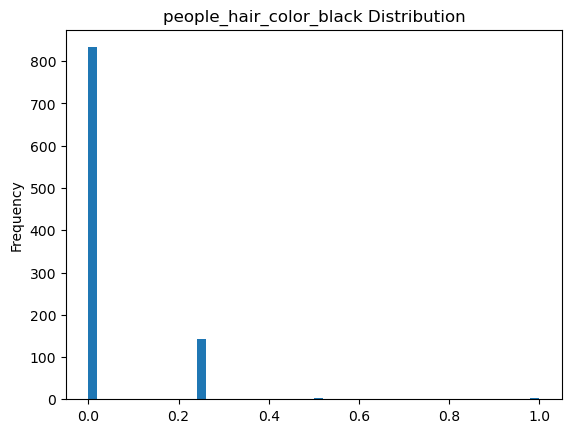

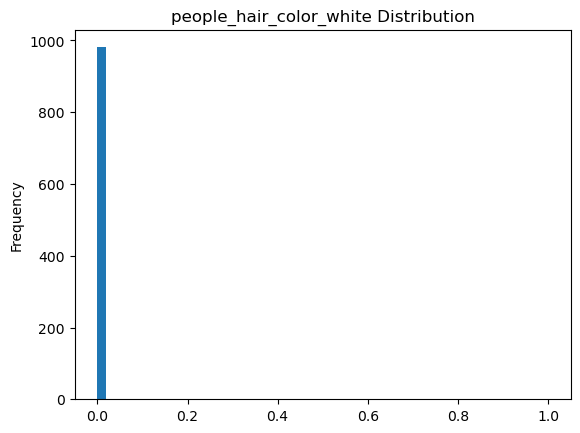

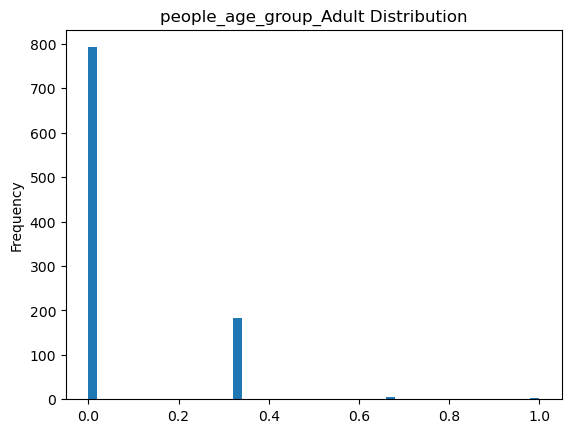

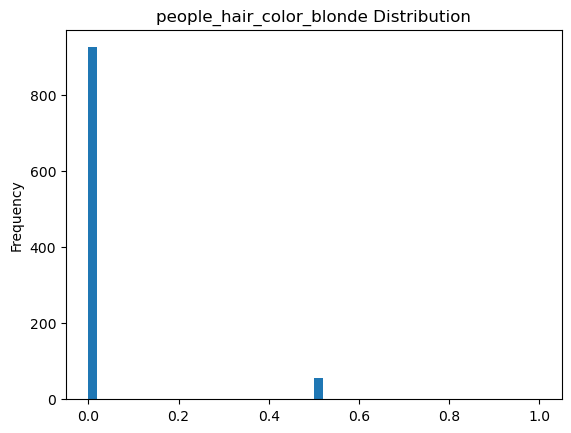

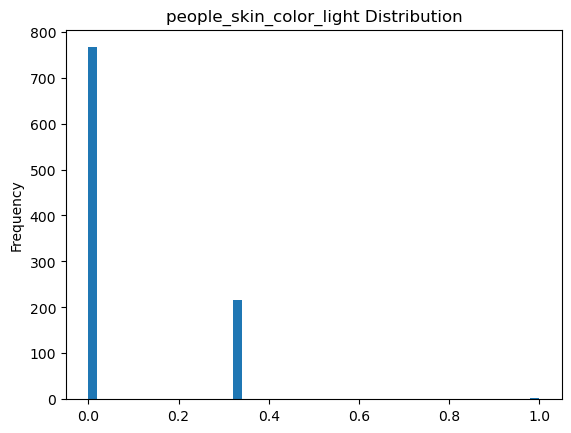

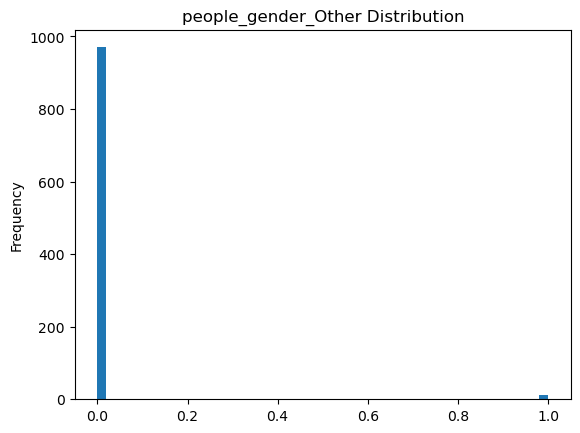

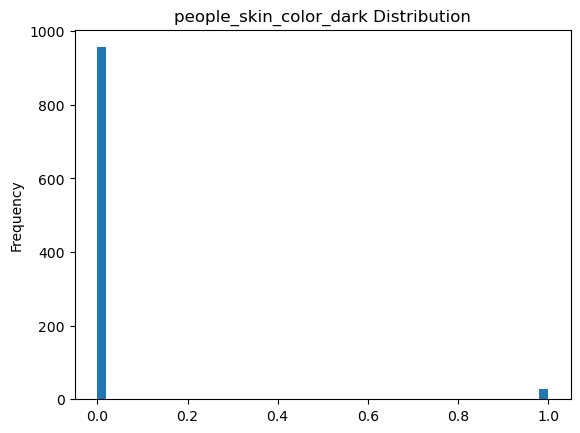

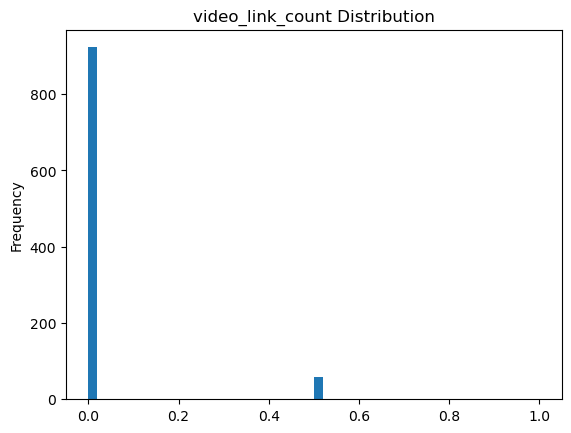

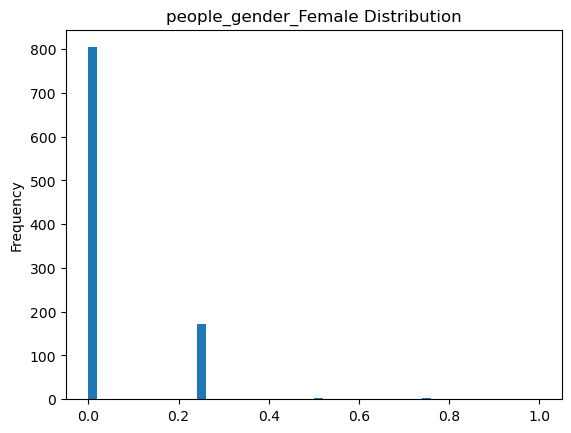

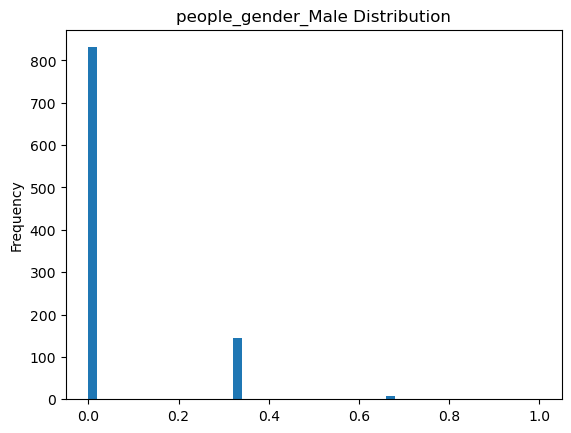

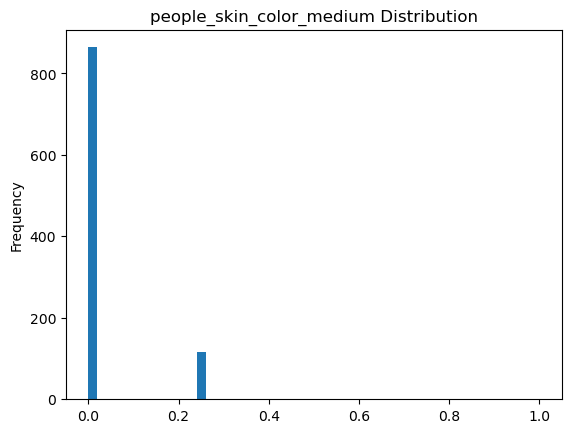

In [28]:

def make_histogram(df, column, bins=50):
    df[column].plot(kind='hist', bins=bins, title=f'{column} Distribution')
    plt.show()

list_of_numeric_cols  = [
    #'followers',
    'people_age_group_Young',
    'people_age_group_Teen',
    'people_age_group_Old',
    'people_physical_attributes_muscular',
    'people_physical_attributes_average',
    'people_common_appearances_professional',
    'people_common_appearances_sporty',
    'people_common_appearances_casual',
    'people_common_appearances_formal',
    'people_hair_color_grey',
    'people_hair_color_other',
    'people_hair_color_red',
    'people_hair_color_brown',
    'people_hair_color_black',
    'people_hair_color_white',
    #'likes',
    'people_age_group_Adult',
    'people_hair_color_blonde',
    'people_skin_color_light',
    'people_gender_Other',
    #'num_comments',
    'people_skin_color_dark',
    'video_link_count',
    #'video_view_count',
    'people_gender_Female',
    'people_gender_Male',
    'people_skin_color_medium'
]

for column in list_of_numeric_cols:
    make_histogram(df, column, bins=50)


Falta:
- Binarizar os atributos contínuos restantes;
- Aplicar métodos de regra de associação;

In [29]:
for col in list_of_numeric_cols:
    df[col] = df[col].apply(lambda x: True if x > 0 else False)



In [30]:
df

,has_a_person,vape_present,is_vaping,img_mentions_brands,text_mentions_brands,Health_ad,are_there_children,sensitive_content_bool,video_link_count,people_gender_Other,...,emotion_displayed_thoughtful,emotion_displayed_tired,location_type_Commercial,location_type_Indoor,location_type_Neutral,location_type_Outdoor,location_type_Private,location_type_Public,high_engagement,low_engagement
0,False,True,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,True,True,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
979,True,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
980,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
981,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [44]:
from mlxtend.frequent_patterns import apriori

itemsets = apriori(df, min_support=0.04, use_colnames=True)
itemsets

,support,itemsets
0,0.439471,(has_a_person)
1,0.282808,(vape_present)
2,0.075280,(is_vaping)
3,0.272635,(img_mentions_brands)
4,0.153611,(text_mentions_brands)
...,...,...
34791,0.042726,"(low_engagement, post_style_array_Informationa..."
34792,0.042726,"(low_engagement, post_style_array_Informationa..."
34793,0.041709,"(low_engagement, post_style_array_Informationa..."
34794,0.048830,"(low_engagement, post_style_array_Informationa..."


In [45]:
he = itemsets['itemsets'].apply(lambda x: 'high_engagement' in x)
le = itemsets['itemsets'].apply(lambda x: 'low_engagement' in x)


itemsets[he].sort_values(by='support', ascending=False)

,support,itemsets
46,0.250254,(high_engagement)
693,0.201424,"(high_engagement, emotion_displayed_other)"
546,0.184130,"(high_engagement, post_style_array_Informational)"
669,0.174975,"(high_engagement, content_type_Image)"
216,0.169888,"(high_engagement, Health_ad)"
...,...,...
3574,0.040692,"(high_engagement, post_style_array_Information..."
846,0.040692,"(high_engagement, people_gender_Male, has_a_pe..."
1270,0.040692,"(high_engagement, target_demographic_general a..."
273,0.040692,"(high_engagement, people_gender_Male)"


In [46]:
from mlxtend.frequent_patterns import association_rules

regras = association_rules(itemsets, metric="confidence", min_threshold=0.99)
regras.sort_values(by="lift", ascending=False, inplace=True)
regras

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8725,"(is_vaping, post_style_array_Informational, ta...","(has_a_person, vape_present)",0.040692,0.132248,0.040692,1.000000,7.561538,1.0,0.035310,inf,0.904560,0.307692,1.000000,0.653846
2794,"(is_vaping, emotion_displayed_other, tone_Nega...","(has_a_person, vape_present)",0.043744,0.132248,0.043744,1.000000,7.561538,1.0,0.037959,inf,0.907447,0.330769,1.000000,0.665385
2786,"(is_vaping, post_style_array_Informational, em...","(has_a_person, vape_present)",0.053917,0.132248,0.053917,1.000000,7.561538,1.0,0.046786,inf,0.917204,0.407692,1.000000,0.703846
2783,"(is_vaping, post_style_array_Informational, to...","(has_a_person, vape_present)",0.042726,0.132248,0.042726,1.000000,7.561538,1.0,0.037076,inf,0.906482,0.323077,1.000000,0.661538
2780,"(content_type_Image, is_vaping, post_style_arr...","(has_a_person, vape_present)",0.048830,0.132248,0.048830,1.000000,7.561538,1.0,0.042372,inf,0.912299,0.369231,1.000000,0.684615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15761,"(low_engagement, type_of_content_array_Health,...",(Health_ad),0.102747,0.836216,0.101729,0.990099,1.184024,1.0,0.015811,16.542218,0.173220,0.121507,0.939549,0.555877
6922,"(img_mentions_brands, low_engagement, post_sty...",(Health_ad),0.102747,0.836216,0.101729,0.990099,1.184024,1.0,0.015811,16.542218,0.173220,0.121507,0.939549,0.555877
22527,"(low_engagement, post_style_array_Informationa...",(Health_ad),0.102747,0.836216,0.101729,0.990099,1.184024,1.0,0.015811,16.542218,0.173220,0.121507,0.939549,0.555877
15597,"(post_style_array_Informational, content_type_...",(Health_ad),0.102747,0.836216,0.101729,0.990099,1.184024,1.0,0.015811,16.542218,0.173220,0.121507,0.939549,0.555877


In [47]:

he_c = regras['antecedents'].apply(lambda x: 'high_engagement' in x)
le_c = regras['antecedents'].apply(lambda x: 'low_engagement' in x)

regras[le_c].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8744,"(low_engagement, post_style_array_Informationa...","(has_a_person, vape_present)",0.042726,0.132248,0.042726,1.000000,7.561538,1.0,0.037076,inf,0.906482,0.323077,1.000000,0.661538
8734,"(low_engagement, post_style_array_Informationa...","(has_a_person, vape_present)",0.045778,0.132248,0.045778,1.000000,7.561538,1.0,0.039724,inf,0.909382,0.346154,1.000000,0.673077
2777,"(low_engagement, is_vaping, target_demographic...","(has_a_person, vape_present)",0.040692,0.132248,0.040692,1.000000,7.561538,1.0,0.035310,inf,0.904560,0.307692,1.000000,0.653846
2789,"(low_engagement, post_style_array_Informationa...","(has_a_person, vape_present)",0.048830,0.132248,0.048830,1.000000,7.561538,1.0,0.042372,inf,0.912299,0.369231,1.000000,0.684615
25821,"(people_common_appearances_casual, low_engagem...","(people_physical_attributes_average, post_styl...",0.040692,0.142421,0.040692,1.000000,7.021429,1.0,0.034896,inf,0.893955,0.285714,1.000000,0.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7703,"(location_type_Public, type_of_content_array_A...",(Health_ad),0.104781,0.836216,0.103764,0.990291,1.184253,1.0,0.016144,16.869786,0.173797,0.123937,0.940722,0.557189
15722,"(low_engagement, emotion_displayed_other, post...",(Health_ad),0.104781,0.836216,0.103764,0.990291,1.184253,1.0,0.016144,16.869786,0.173797,0.123937,0.940722,0.557189
6922,"(img_mentions_brands, low_engagement, post_sty...",(Health_ad),0.102747,0.836216,0.101729,0.990099,1.184024,1.0,0.015811,16.542218,0.173220,0.121507,0.939549,0.555877
22527,"(low_engagement, post_style_array_Informationa...",(Health_ad),0.102747,0.836216,0.101729,0.990099,1.184024,1.0,0.015811,16.542218,0.173220,0.121507,0.939549,0.555877
